
# **🎓 Dhaka International University**

---

#**💻 Department:** Computer Science & Engineering
## **📝 Lab Report Name:** Confusion matrix implementation with prima indian daibetes dataset
### **📖 Course Name:** Artificial intelligence & Neural Networks
### **📑 Course Code:** CSE-408

---

### **Submission By**
**⏩ Name:** Zahidul Islam\
**⏩ Roll:** 68\
**⏩ Batch:** E-100B

---

### **Submission TO**
**⏩ Name:** Md Namzmus Sakib, Lecturer\
**⏩ Submission Date:** 17-11-2025



In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset

In [6]:
data = pd.read_csv("/content/data/diabetes.csv")

# Show dataset

In [7]:
print("Dataset Preview:\n", data.head())

Dataset Preview:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Encode categorical columns into numbers

In [8]:

label_encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':   # If column is categorical
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

print("\nEncoded Dataset:\n", data.head())


Encoded Dataset:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Separate features (X) and target (y)

In [9]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes Model (CategoricalNB is suitable for categorical data)

In [11]:
model = CategoricalNB()
model.fit(X_train, y_train)

CategoricalNB()

# Test Accuracy

## Discretize Numerical Features

Convert numerical features in your dataset (X) into discrete categories using `KBinsDiscretizer` with 5 bins. This will transform continuous or wide-ranging numerical values into a fixed number of bins, making them suitable for `CategoricalNB`. We will apply this transformation to both the training and test sets after splitting.


In [12]:
from sklearn.preprocessing import KBinsDiscretizer

# Create an instance of KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform', subsample=None)

# Fit the discretizer to the training data and transform both training and test data
X_train_discretized = discretizer.fit_transform(X_train)
X_test_discretized = discretizer.transform(X_test)

# Convert the discretized arrays back to pandas DataFrames with original column names
X_train_discretized = pd.DataFrame(X_train_discretized, columns=X_train.columns, index=X_train.index)
X_test_discretized = pd.DataFrame(X_test_discretized, columns=X_test.columns, index=X_test.index)

print("Discretization complete. First 5 rows of X_train_discretized:")
print(X_train_discretized.head())

Discretization complete. First 5 rows of X_train_discretized:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
60           0.0      2.0            0.0            0.0      0.0  0.0   
618          2.0      2.0            3.0            1.0      0.0  2.0   
346          0.0      3.0            1.0            1.0      0.0  2.0   
294          0.0      4.0            2.0            0.0      0.0  1.0   
231          1.0      3.0            3.0            2.0      2.0  3.0   

     DiabetesPedigreeFunction  Age  
60                        0.0  0.0  
618                       2.0  2.0  
346                       1.0  0.0  
294                       0.0  3.0  
231                       0.0  2.0  


**Reasoning**:
The numerical features have been discretized. Now, I need to retrain the `CategoricalNB` model using the `X_train_discretized` data and the original `y_train` target variable, as `CategoricalNB` requires discrete input features.



In [13]:
model = CategoricalNB()
model.fit(X_train_discretized, y_train)
print("Categorical Naive Bayes model retrained with discretized data.")

Categorical Naive Bayes model retrained with discretized data.


**Reasoning**:
The model has been retrained with discretized data. Now, I need to evaluate its performance on the discretized test data by calculating its accuracy.



In [14]:
accuracy = model.score(X_test_discretized, y_test)
print(f"\nModel Accuracy after discretization: {accuracy:.2f}")


Model Accuracy after discretization: 0.78


#My Test Case

In [15]:
test_input_1 = {
    "Pregnancies": 7,
    "Glucose": 190,
    "BloodPressure": 90,
    "SkinThickness": 50,
    "Insulin": 300,
    "BMI": 45.0,
    "DiabetesPedigreeFunction": 1.0,
    "Age": 55
}

### New Test Case (test_input_2)

In [16]:
test_input_2 = {
    "Pregnancies": 1,
    "Glucose": 90,
    "BloodPressure": 60,
    "SkinThickness": 20,
    "Insulin": 80,
    "BMI": 25.0,
    "DiabetesPedigreeFunction": 0.2,
    "Age": 25
}
print("New Test Input 2:", test_input_2)

New Test Input 2: {'Pregnancies': 1, 'Glucose': 90, 'BloodPressure': 60, 'SkinThickness': 20, 'Insulin': 80, 'BMI': 25.0, 'DiabetesPedigreeFunction': 0.2, 'Age': 25}


# Predict

In [17]:
test_df_1 = pd.DataFrame([test_input_1])

# Discretize the new test input using the already fitted discretizer
test_input_1_discretized = discretizer.transform(test_df_1)
test_input_1_discretized = pd.DataFrame(test_input_1_discretized, columns=test_df_1.columns, index=test_df_1.index)

print("Discretized Test Input 1:")
print(test_input_1_discretized.head())

Discretized Test Input 1:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0          2.0      4.0            3.0            3.0      1.0  3.0   

   DiabetesPedigreeFunction  Age  
0                       1.0  2.0  


In [18]:
prediction_1 = model.predict(test_input_1_discretized)[0]

print("\nTest Input 1:", test_input_1)
print(f"\nPredicted Outcome for Test Input 1: {prediction_1}")


Test Input 1: {'Pregnancies': 7, 'Glucose': 190, 'BloodPressure': 90, 'SkinThickness': 50, 'Insulin': 300, 'BMI': 45.0, 'DiabetesPedigreeFunction': 1.0, 'Age': 55}

Predicted Outcome for Test Input 1: 1


In [19]:
test_df_2 = pd.DataFrame([test_input_2])

# Discretize the new test input using the already fitted discretizer
test_input_2_discretized = discretizer.transform(test_df_2)
test_input_2_discretized = pd.DataFrame(test_input_2_discretized, columns=test_df_2.columns, index=test_df_2.index)

print("Discretized Test Input 2:")
print(test_input_2_discretized.head())

Discretized Test Input 2:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0          0.0      2.0            2.0            1.0      0.0  1.0   

   DiabetesPedigreeFunction  Age  
0                       0.0  0.0  


### Predict Outcome for new input

In [20]:
prediction_2 = model.predict(test_input_2_discretized)[0]

print("\nTest Input 2:", test_input_2)
print(f"\nPredicted Outcome for Test Input 2: {prediction_2}")


Test Input 2: {'Pregnancies': 1, 'Glucose': 90, 'BloodPressure': 60, 'SkinThickness': 20, 'Insulin': 80, 'BMI': 25.0, 'DiabetesPedigreeFunction': 0.2, 'Age': 25}

Predicted Outcome for Test Input 2: 0


#use a confusion matrix to check accuracy, precision, recall, f1 score.

In [21]:
y_pred = model.predict(X_test_discretized)

# Calculate and print Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate and print Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Alternatively, a full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[83 16]
 [18 37]]

Accuracy: 0.78
Precision: 0.70
Recall: 0.67
F1 Score: 0.69

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        99
           1       0.70      0.67      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



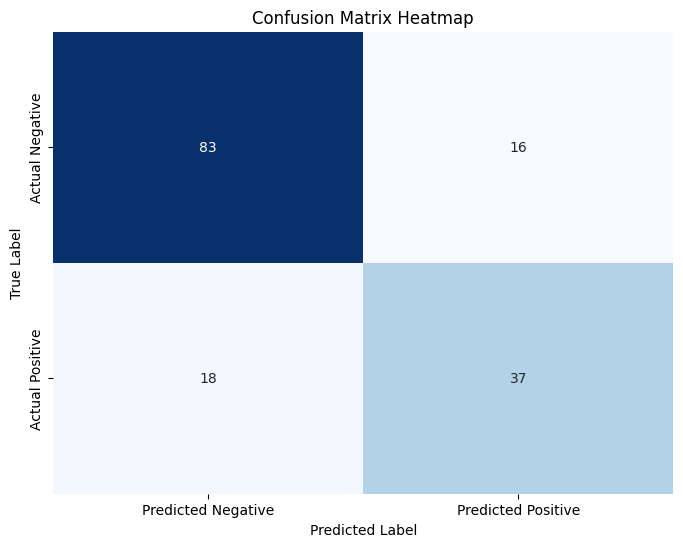

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()